In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DS203/master.csv')
df.drop(columns = ['country-year'],inplace = True)
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df2 = df[['country','year','suicides_no','suicides/100k pop']].groupby(['country','year']).sum().groupby(['country']).mean()
df2.sort_values(by='suicides_no',ascending=False,inplace=True)
print(df2.head(6))

                     suicides_no  suicides/100k pop
country                                            
Russian Federation  44805.259259         418.708519
United States       33355.258065         165.837742
Japan               26029.096774         258.878387
Ukraine             11426.785714         318.987857
Germany             11202.384615         186.718846
France              10970.900000         260.108333


In [ ]:
print(df2.index)

Index(['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany',
       'France', 'Republic of Korea', 'Brazil', 'Poland', 'Sri Lanka',
       ...
       'Seychelles', 'Saint Vincent and Grenadines', 'Kiribati', 'Bahamas',
       'Maldives', 'Grenada', 'San Marino', 'Antigua and Barbuda', 'Dominica',
       'Saint Kitts and Nevis'],
      dtype='object', name='country', length=101)


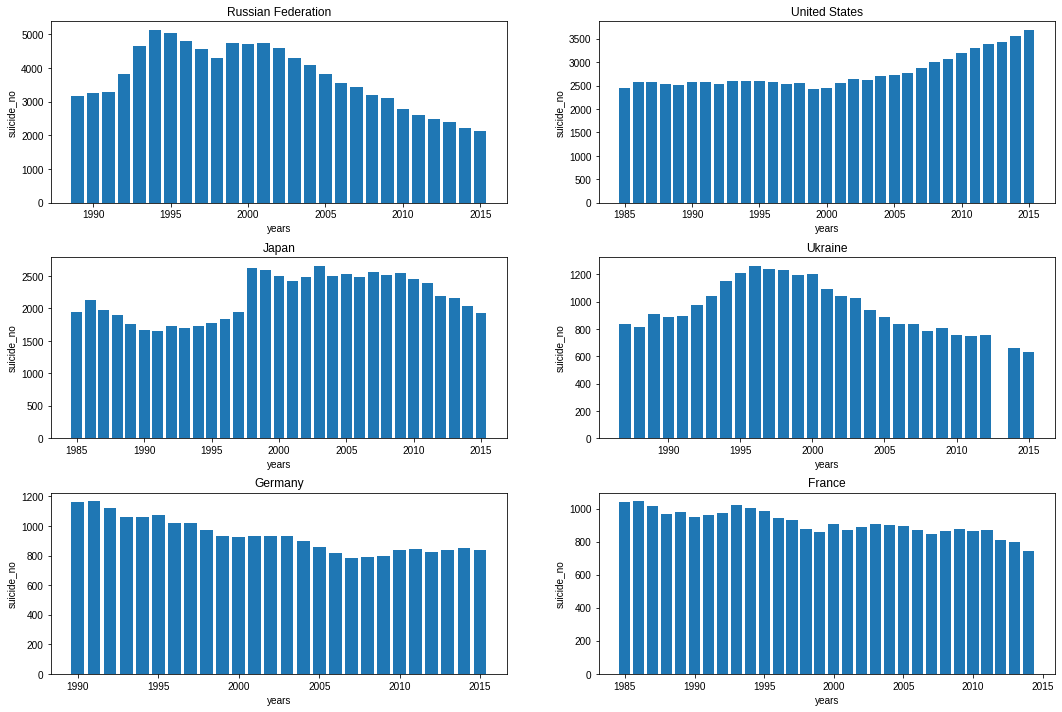

In [ ]:
#displaying suicides for each year separately

fig,ax = plt.subplots(3,2,figsize=(18,12))
fig.subplots_adjust(hspace=0.3)
plt.style.use('seaborn')

for i,x in enumerate(df2.index[:6]):
  df3 = df.loc[df['country']==x]
  df3 = df3.groupby('year').mean()
  ax[i//2][i%2].bar(df3.index,df3.suicides_no)
  ax[i//2][i%2].set_title(x)
  ax[i//2][i%2].set_xlabel('years')
  ax[i//2][i%2].set_ylabel('suicide_no')

plt.show()

In [ ]:
options = ['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany','France']

df4 = df.loc[df['country'].isin(options)]
df4 = df4.groupby(['year','country','age']).mean()
display(df4)

suicides_no  ...  gdp_per_capita ($)
year country       age                       ...                    
1985 France        15-24 years        468.5  ...             10765.0
                   25-34 years        969.5  ...             10765.0
                   35-54 years       1908.5  ...             10765.0
                   5-14 years          17.5  ...             10765.0
                   55-74 years       1790.5  ...             10765.0
...                                     ...  ...                 ...
2015 United States 25-34 years       3473.5  ...             60387.0
                   35-54 years       7843.5  ...             60387.0
                   5-14 years         206.5  ...             60387.0
                   55-74 years       5970.0  ...             60387.0
                   75+ years         1855.5  ...             60387.0

[1038 rows x 5 columns]

In [ ]:
df4 = df.loc[df['country'].isin(options)]

def my_func(x):
  if x[:2]=='5-':
    x = '05-14 years'
  return x

df4['age'] = df4['age'].transform(my_func)

df4 = df4.groupby(['country','year','age']).mean()
df4 = df4[['suicides_no','suicides/100k pop']]
df4.sort_index(level = 'age')
display(df4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


suicides_no  suicides/100k pop
country       year age                                        
France        1985 05-14 years         17.5              0.460
                   15-24 years        468.5             10.840
                   25-34 years        969.5             22.900
                   35-54 years       1908.5             28.240
                   55-74 years       1790.5             38.005
...                                     ...                ...
United States 2015 15-24 years       2745.5             12.250
                   25-34 years       3473.5             15.780
                   35-54 years       7843.5             18.845
                   55-74 years       5970.0             18.145
                   75+ years         1855.5             21.695

[1038 rows x 2 columns]

In [ ]:
print(df4.loc['France'])
age_groups = ['05-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

                  suicides_no  suicides/100k pop
year age                                        
1985 05-14 years         17.5              0.460
     15-24 years        468.5             10.840
     25-34 years        969.5             22.900
     35-54 years       1908.5             28.240
     55-74 years       1790.5             38.005
...                       ...                ...
2014 15-24 years        187.0              4.910
     25-34 years        425.0             10.905
     35-54 years       1657.0             19.570
     55-74 years       1284.5             18.805
     75+ years          874.0             35.265

[180 rows x 2 columns]


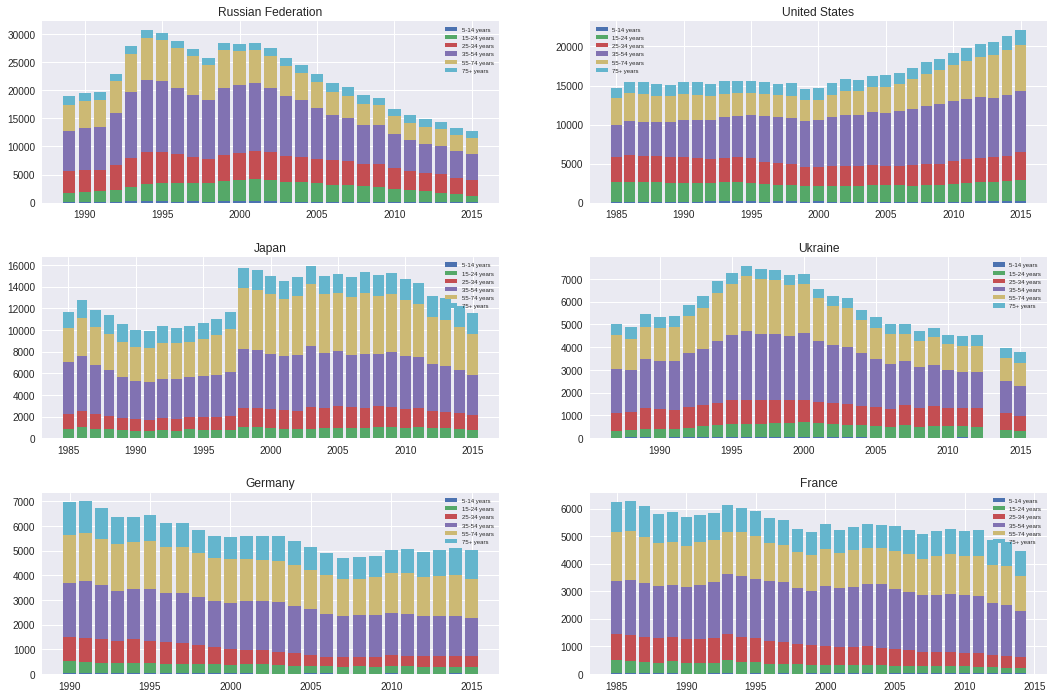

In [ ]:
fig,ax  =plt.subplots(3,2,figsize=(18,12))
fig.subplots_adjust(hspace=0.3)

for l,row in enumerate(options):
  df_temp = df4.loc[row]
  indices = (df_temp.index.remove_unused_levels().levels[0])
  dicter = [[],[],[],[],[],[]]
  for years in indices:
    reduced = df_temp.loc[years]
    gens = reduced.index
    for i,x in enumerate(gens):
      dicter[i].append(reduced.loc[x]['suicides_no'])
  dicter = np.array(dicter)
  ax[l//2][l%2].bar(indices,dicter[0],label='5-14 years')
  ax[l//2][l%2].bar(indices,dicter[1],bottom=dicter[0],label='15-24 years')
  ax[l//2][l%2].bar(indices,dicter[2],bottom=dicter[1]+dicter[0],label='25-34 years')
  ax[l//2][l%2].bar(indices,dicter[3],bottom=dicter[2]+dicter[1]+dicter[0],label='35-54 years')
  ax[l//2][l%2].bar(indices,dicter[4],bottom=dicter[3]+dicter[2]+dicter[1]+dicter[0],label='55-74 years')
  ax[l//2][l%2].bar(indices,dicter[5],bottom=dicter[4]+dicter[3]+dicter[2]+dicter[1]+dicter[0],label='75+ years')
  ax[l//2][l%2].legend(prop={'size':6})
  ax[l//2][l%2].set_title(row)

plt.show()

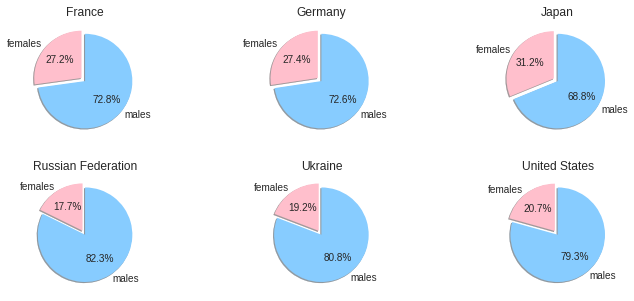

In [ ]:
#analyzing only the top countries
df_sex = df.loc[df['country'].isin(options)]
df_sex = df_sex[['country','sex','suicides_no']].groupby(['country','sex']).sum()
#display(df_sex)
indices = df_sex.index.remove_unused_levels().levels[0]

fig,ax  =plt.subplots(2,3,figsize=(12,5))
fig.subplots_adjust(hspace=0.3)

males = 0;
females = 0;
for i,country in enumerate(indices):
  df_temp = df_sex.loc[country]
  ax[i//3][i%3].pie([df_temp['suicides_no'][0],df_temp['suicides_no'][1]],labels = ['females','males'],colors=[(1,0.75,0.8),(0.53,0.8,1)],explode=(0.1,0),autopct='%1.1f%%',shadow=True, startangle=90)
  ax[i//3][i%3].set_title(country)
  #also counting total
  males += df_temp['suicides_no'][0]
  females += df_temp['suicides_no'][1]

plt.show()

This clearly shows the difference between the number of suicides of men and women

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


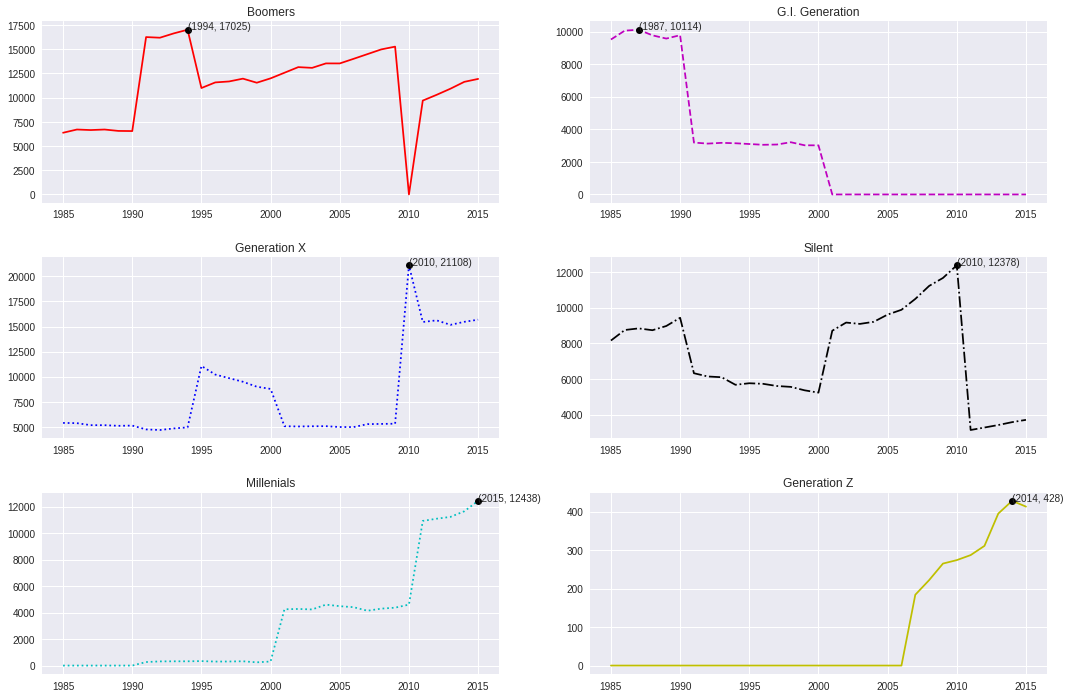

In [ ]:
#worst year for wach generation can be found by the same method as used in the graph for part b but only for US
df4 = df.loc[df['country']=='United States']

def my_func(x):
  if x[:2]=='5-':
    x = '05-14 years'
  return x

df4['age'] = df4['age'].transform(my_func)
df4 = df4.groupby(['year','generation']).sum()
#preprocessing complete

fig,ax  =plt.subplots(3,2,figsize=(18,12))
fig.subplots_adjust(hspace=0.3)

df_temp = df4[['suicides_no']]
#display(df_temp)
indices = (df_temp.index.remove_unused_levels().levels[0])
#dicter stores values for each generation year-wise
dicter = {'Boomers':[],'G.I. Generation':[],'Generation X':[],'Silent':[],'Millenials':[],'Generation Z':[]}
for years in indices:

  reduced = df_temp.loc[years]
  gens = list(reduced.index)
  for i,x in enumerate(list(dicter.keys())):
    if x in gens:
      dicter[x].append(reduced.loc[x]['suicides_no'])
    else:
      dicter[x].append(0)

#print(dicter)
markers = ['r-','m--','b:','k-.','c:','y-']
for i,x in enumerate(dicter.keys()):
  ax[i//2][i%2].plot(indices,dicter[x],markers[i])
  ax[i//2][i%2].set_title(x)
  ax[i//2][i%2].plot([indices[np.argmax(np.array(dicter[x]))]],[max(dicter[x])],'ko')
  ax[i//2][i%2].annotate("("+str(indices[np.argmax(np.array(dicter[x]))])+", "+str(max(dicter[x]))+")",(indices[np.argmax(np.array(dicter[x]))],max(dicter[x])))
plt.show()


,age,sex,population,suicides_no
0,05-14 years,female,20034103,63
1,15-24 years,female,19105073,570
2,25-34 years,female,19771195,854
3,35-54 years,female,41881451,2736
4,55-74 years,female,22717040,1084
5,75+ years,female,10494416,425
6,05-14 years,male,21043474,244
7,15-24 years,male,20078818,3424
8,25-34 years,male,20120529,3938
9,35-54 years,male,40945028,9263


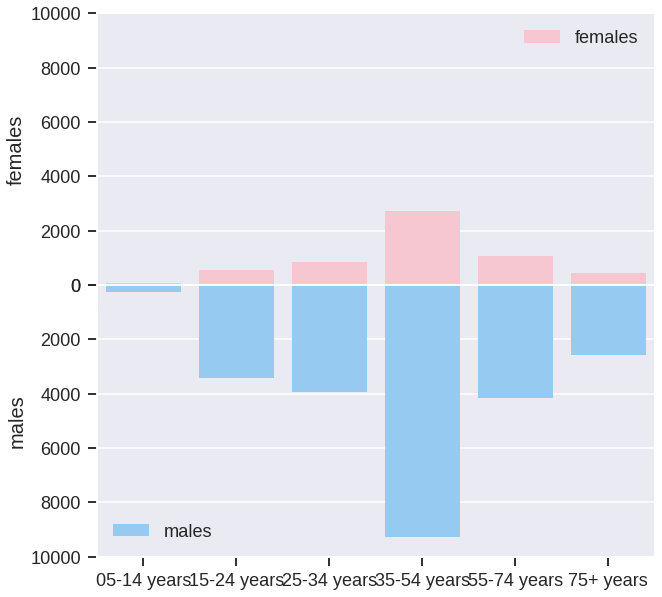

In [ ]:
dfk = df.loc[df['country']=='United States']
dfk = dfk.loc[df['year']==2000]
dfk = dfk[['age','sex','population','suicides_no']]
dfk['age'] = dfk['age'].transform(my_func)
dfk = dfk.sort_values(by=['sex','age'])
dfk = dfk.reset_index().drop(['index'],axis=1)

display(dfk)
ages = dfk['age'].unique()

#Commented code is for population only and not suicides_no of males and females
'''
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=ages,y=list(dfk['suicides_no'][:6]),color=(1,0.75,0.8),label = 'females')

for p in ax.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

sns.barplot(x=ages,y=list(dfk['suicides_no'][6:]),color=(0.53,0.8,1),label = 'males')
ax.set_xticks(np.arange(0,6,1))
ax.set_yticks(np.arange(0,1e4+1,2e3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([f'{abs(t):.2f}' for t in ticks])
ax.spines['bottom'].set_position('zero')

plt.legend()
plt.show()'''

fig,ax =plt.subplots(2,1,figsize=(10,10))

sns.barplot(x=ages,y=list(dfk['suicides_no'][:6]),color=(1,0.75,0.8),label = 'females',ax=ax[0])
sns.barplot(x=ages,y=list(dfk['suicides_no'][6:]),color=(0.53,0.8,1),label = 'males',ax=ax[1])
ax[1].set_ylim(0,10000)
ax[1].invert_yaxis()
ax[0].set_ylim(0,10000)
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel("females", size = 20)
ax[1].set_ylabel("males", size = 20)
ax[0].set_xlabel("Age Categories",size = 20)


plt.subplots_adjust(hspace=0)
plt.show()

In [ ]:
df_sum = df.dropna(axis=0).groupby(['country']).sum()
df_mean = df.dropna(axis=0).groupby(['country']).mean()

countries = pd.Series(df_sum.index)

#taking log transform of population
df_merged = pd.concat([pd.Series(np.log(df_sum['population'])),df_sum['suicides_no'],pd.Series(df_mean['HDI for year'])],axis=1)
display(df_merged)

,population,suicides_no,HDI for year
country,,,
Albania,16.233123,238,0.673000
Antigua and Barbuda,12.503652,0,0.781667
Argentina,19.670110,27485,0.779600
Armenia,16.985532,628,0.690125
Australia,18.871399,19654,0.912750
...,...,...,...
United Arab Emirates,16.310381,207,0.825000
United Kingdom,20.164493,45037,0.863500
United States,21.715126,355963,0.891600


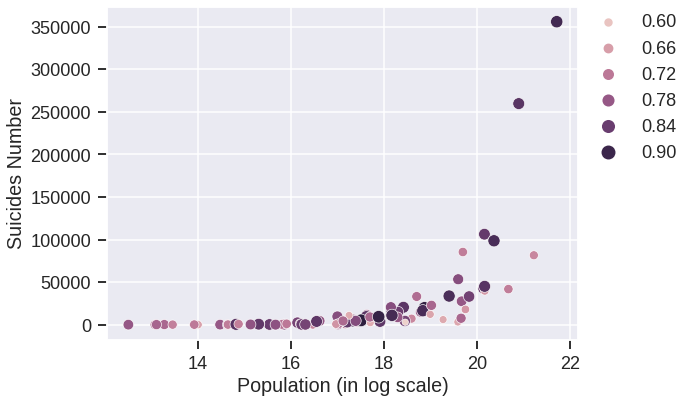

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x='population',y='suicides_no',size = 'HDI for year',hue='HDI for year', data=df_merged)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Population (in log scale)")
plt.ylabel("Suicides Number")
plt.tight_layout()